In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import math
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('inventory.db')

In [3]:
df = pd.read_sql_query("select * from Vendor_Sales_Summary", conn)
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [4]:
num_cat = df.select_dtypes(include = np.number).columns
num_cat

Index(['VendorNumber', 'Brand', 'Volume', 'PurchasePrice', 'Actual_Price',
       'TotalPurchaseQuantity', 'TotalPurchaseDollar', 'TotalSalesQuantity',
       'TotalSalesPrice', 'TotalSalesDollar', 'TotalSalesExciseTax',
       'total_freight', 'GrossProfit', 'ProfitMargin', 'StockTurnOver',
       'SalestoPurchaseRatio'],
      dtype='object')

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10756.00,10643.25,18792.51,2.00,3951.00,7153.00,9552.00,201359.00
Brand,10756.00,18024.48,12700.57,58.00,5740.75,18742.50,25509.25,90631.00
Volume,10756.00,846.63,663.02,50.00,750.00,750.00,750.00,20000.00
PurchasePrice,10756.00,24.32,108.95,0.36,6.84,10.52,19.47,5681.81
Actual_Price,10756.00,35.56,147.81,0.49,10.99,15.99,28.99,7499.99
TotalPurchaseQuantity,10756.00,3136.39,11068.30,1.00,36.00,263.00,1978.50,337660.00
TotalPurchaseDollar,10756.00,30067.39,122767.86,0.71,454.53,3669.78,20724.51,3811251.60
TotalSalesQuantity,10756.00,3073.02,10926.16,0.00,33.00,262.50,1931.00,334939.00
TotalSalesPrice,10756.00,18779.98,44868.82,0.00,289.72,2867.07,16095.09,672819.31
TotalSalesDollar,10756.00,42177.14,167242.39,0.00,729.27,5310.48,28396.92,5101919.51


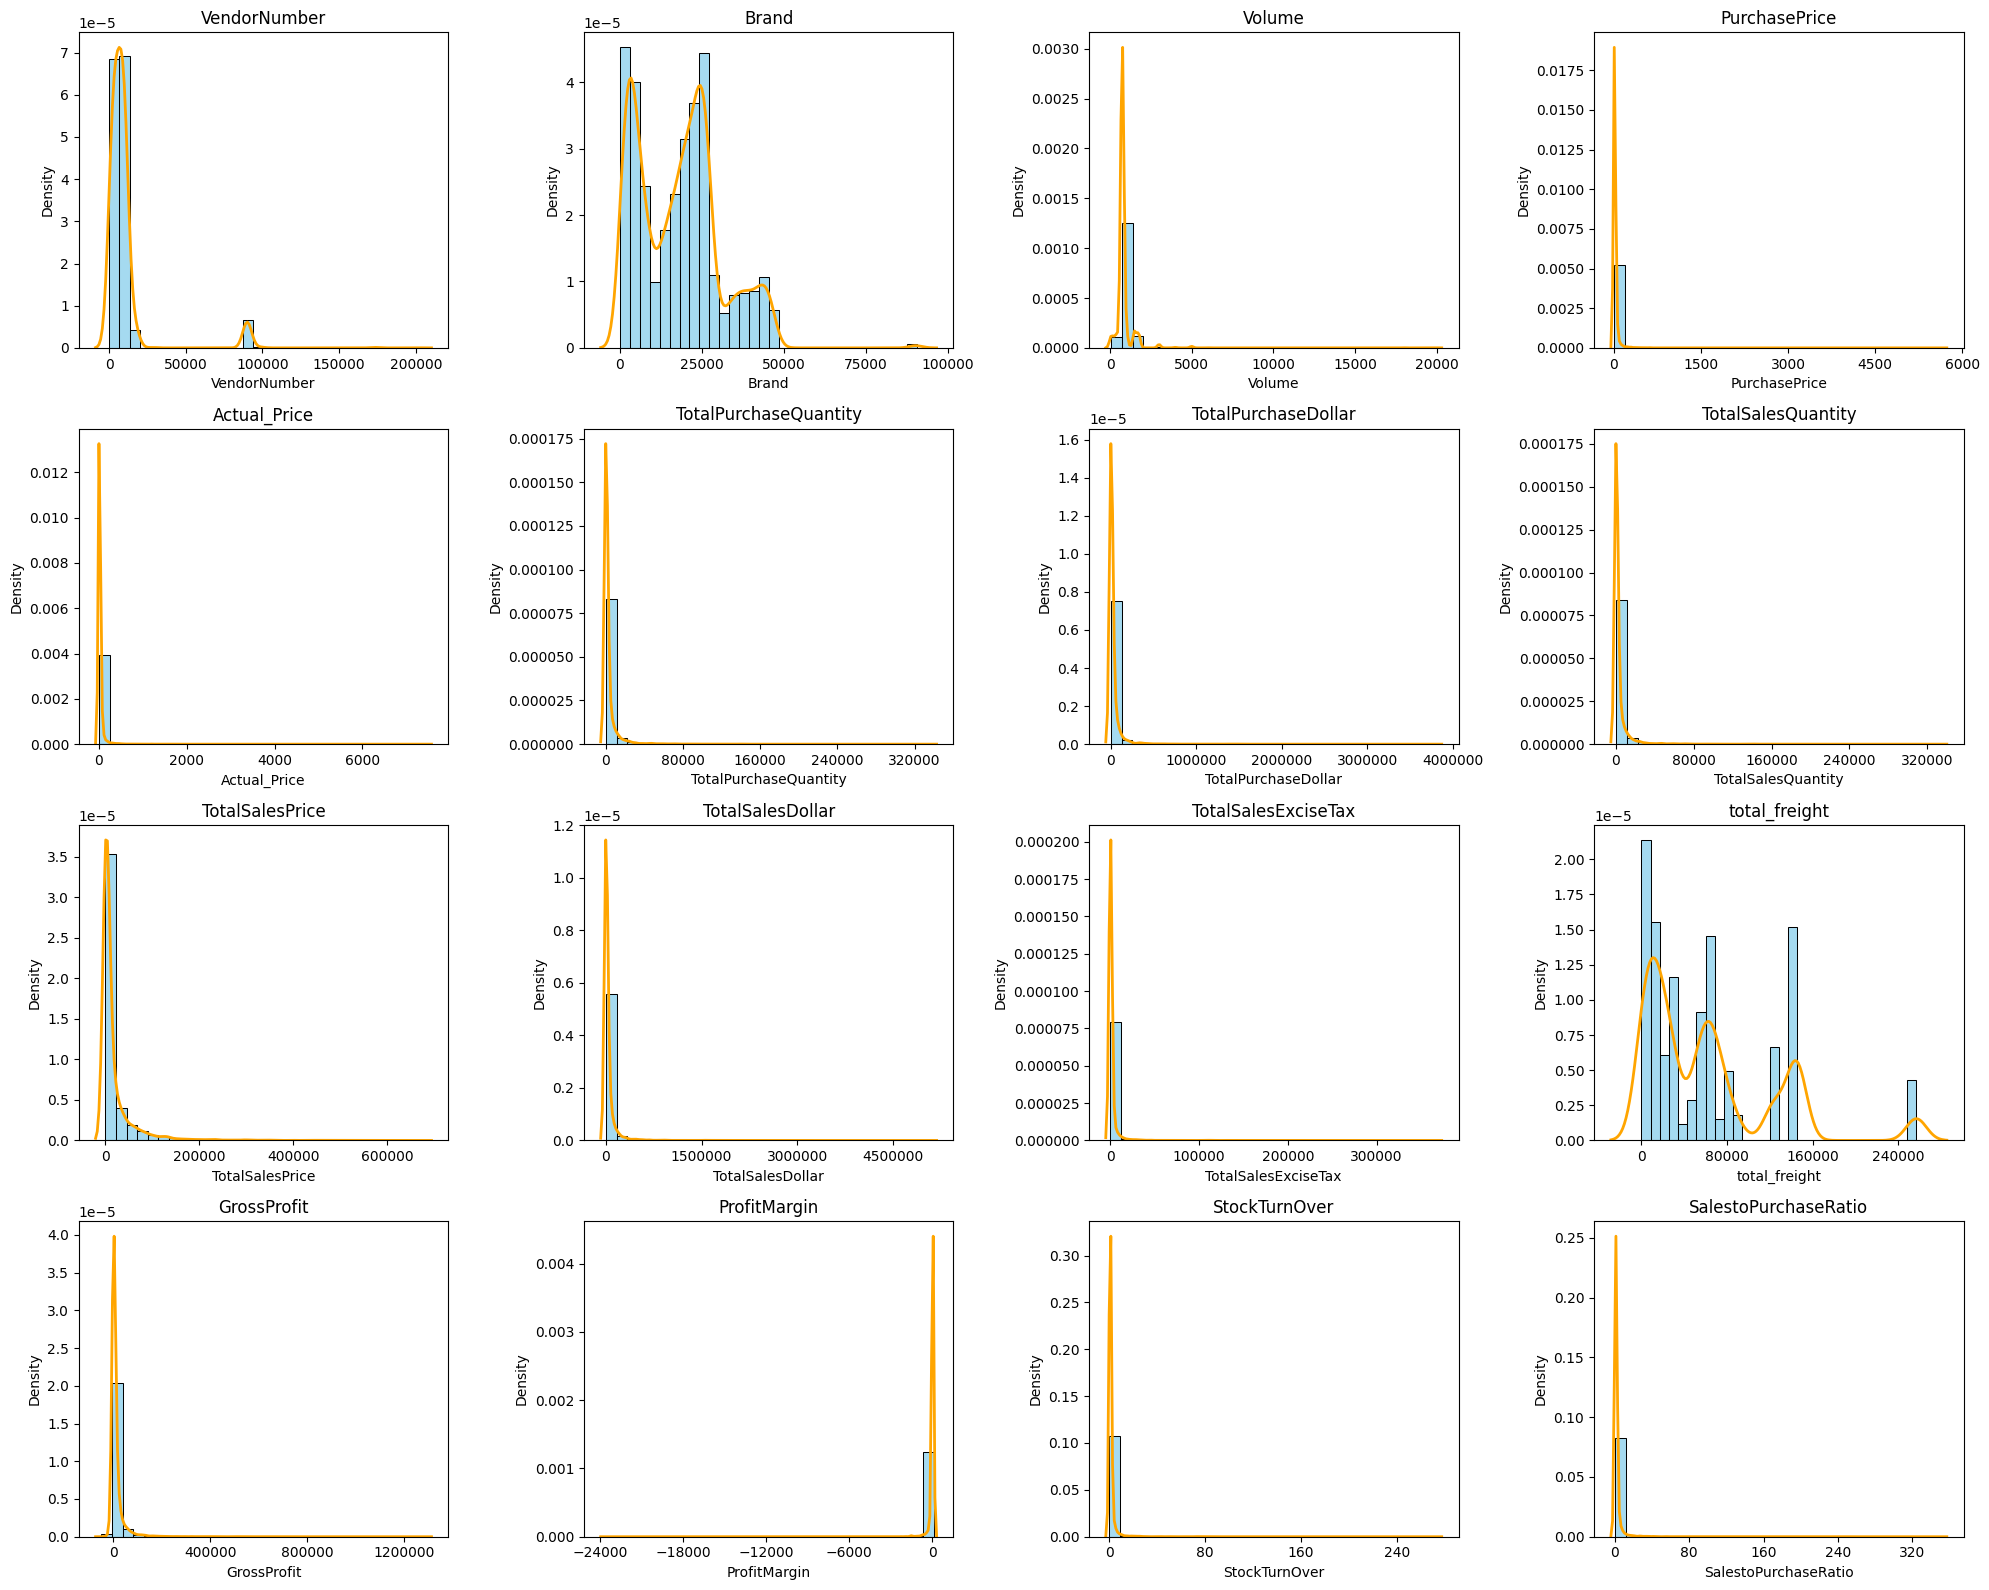

In [6]:
#Through AI

num_cat = df.select_dtypes(include=np.number).columns

# Number of subplots per row
n_cols = 4
n_rows = math.ceil(len(num_cat) / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(num_cat):
    # Histogram
    sns.histplot(df[col], bins=30, ax=axes[i], color="skyblue", stat="density")
    
    # KDE in orange
    sns.kdeplot(df[col], ax=axes[i], color="orange", linewidth=2)

    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("Density")

    # Keep numbers plain and evenly spaced
    axes[i].ticklabel_format(style='plain', axis='x')  # Avoid scientific notation
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # ~5 spaced ticks

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

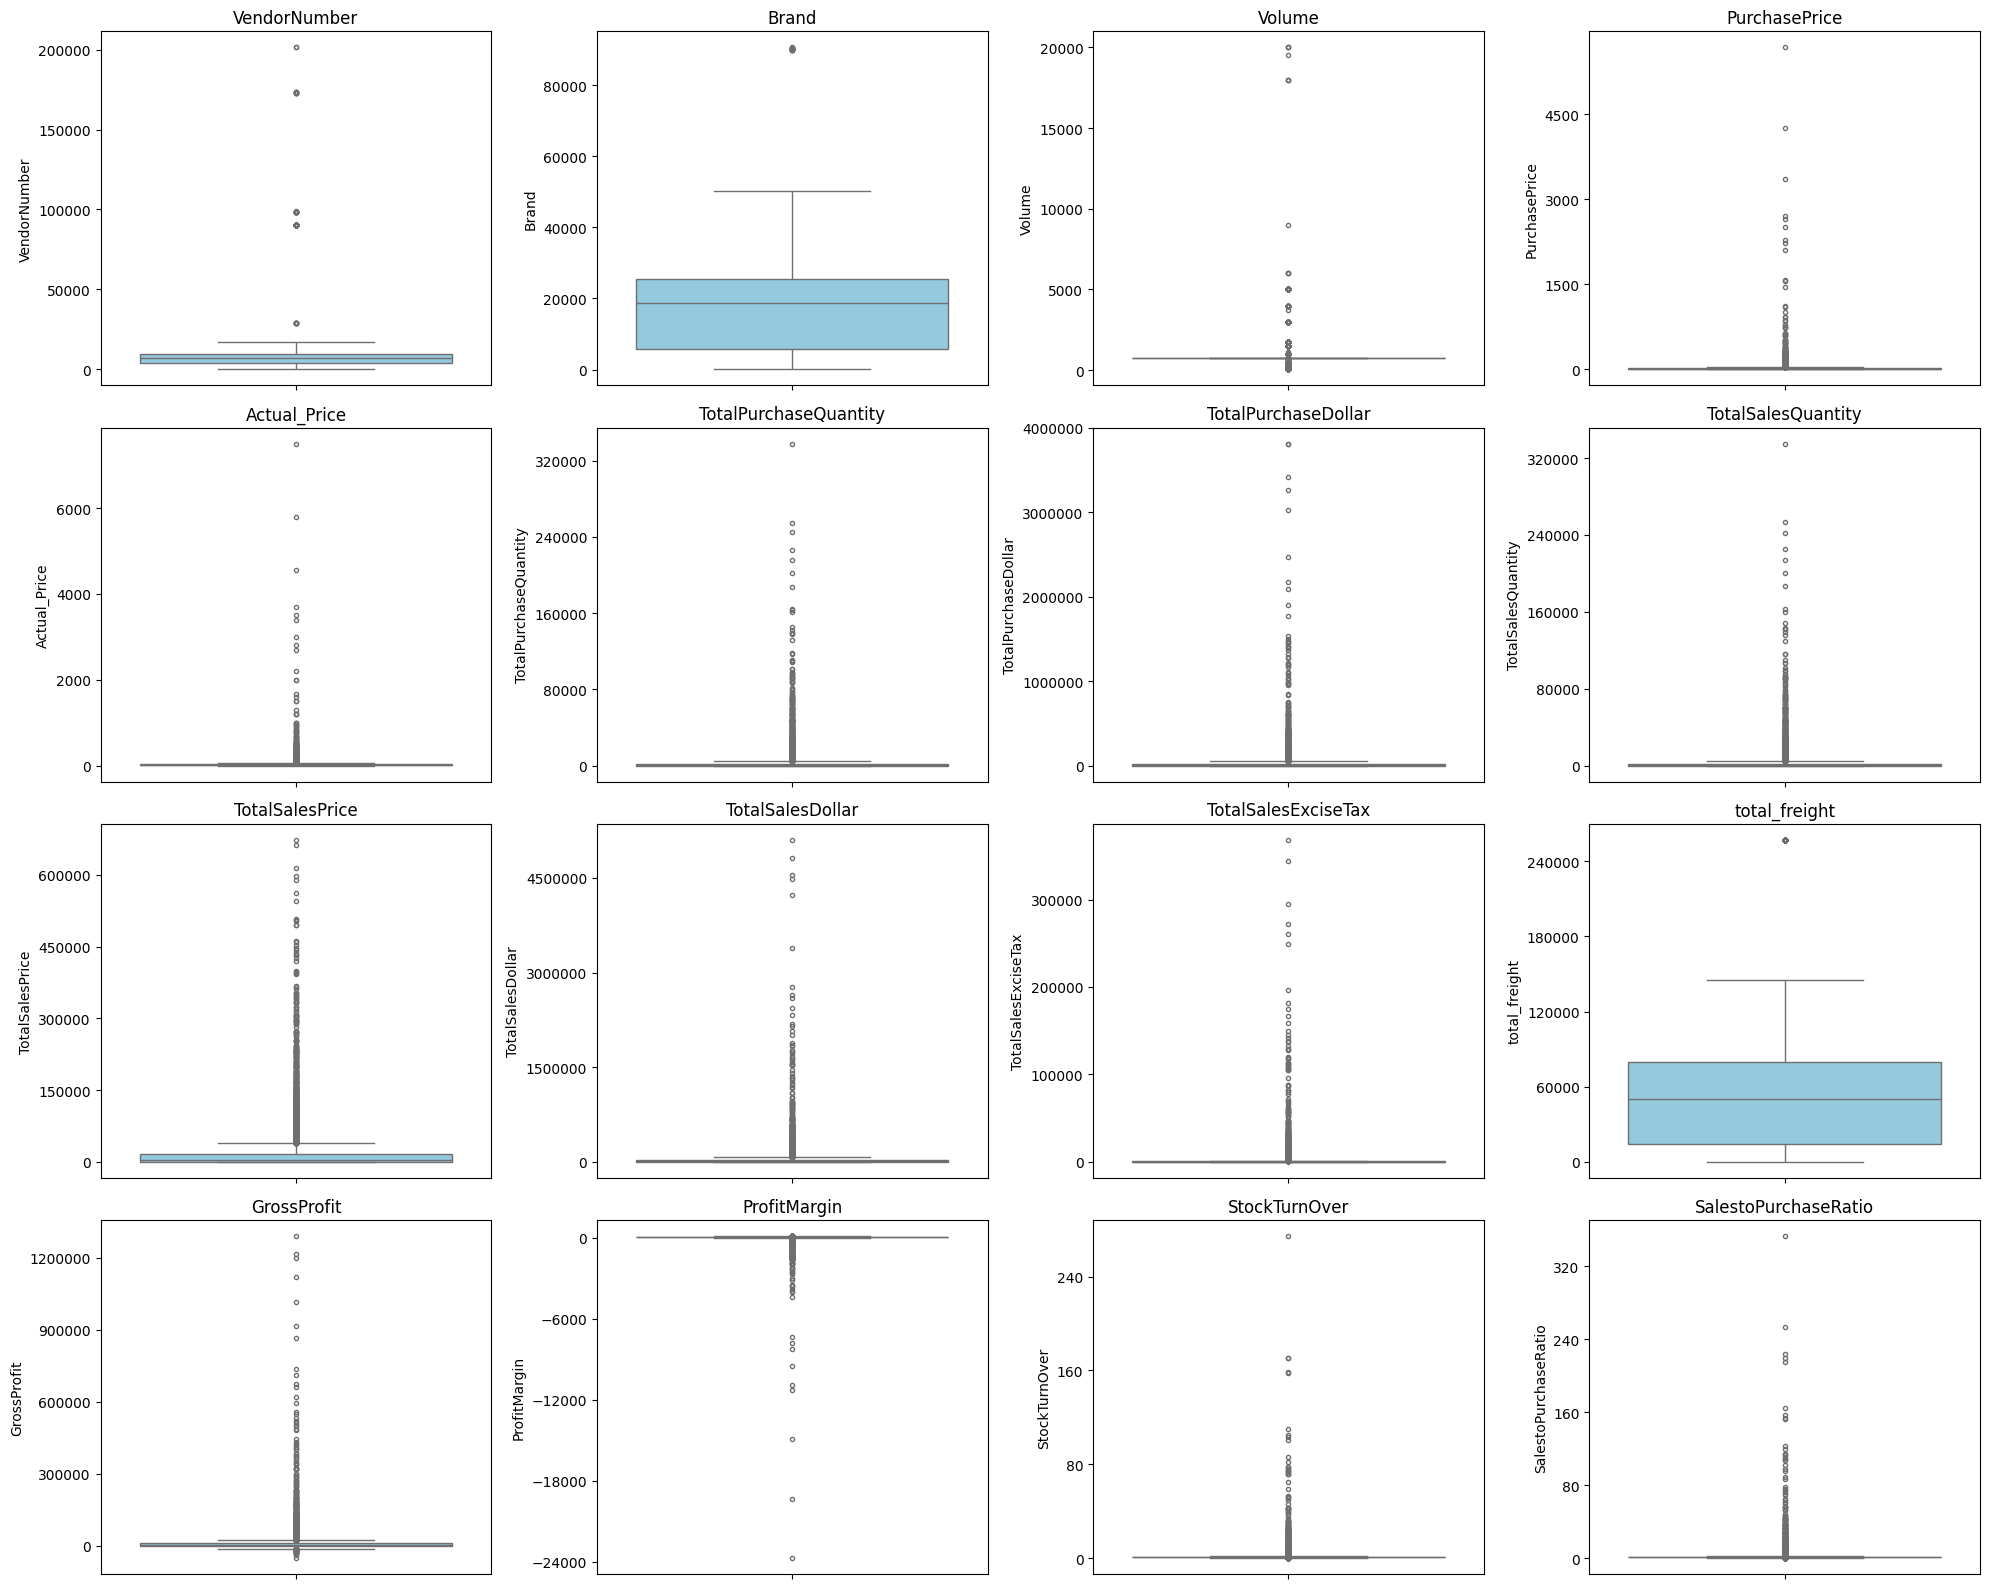

In [7]:
#through AI

num_cat = df.select_dtypes(include=np.number).columns

# Number of subplots per row
n_cols = 4
n_rows = math.ceil(len(num_cat) / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

# Plot each numerical column vertically
for i, col in enumerate(num_cat):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue", fliersize=3)
    axes[i].set_title(col, fontsize=12)
    
    # Keep y-axis numbers clean
    axes[i].ticklabel_format(style='plain', axis='y')
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10756.00,10643.25,18792.51,2.00,3951.00,7153.00,9552.00,201359.00
Brand,10756.00,18024.48,12700.57,58.00,5740.75,18742.50,25509.25,90631.00
Volume,10756.00,846.63,663.02,50.00,750.00,750.00,750.00,20000.00
PurchasePrice,10756.00,24.32,108.95,0.36,6.84,10.52,19.47,5681.81
Actual_Price,10756.00,35.56,147.81,0.49,10.99,15.99,28.99,7499.99
TotalPurchaseQuantity,10756.00,3136.39,11068.30,1.00,36.00,263.00,1978.50,337660.00
TotalPurchaseDollar,10756.00,30067.39,122767.86,0.71,454.53,3669.78,20724.51,3811251.60
TotalSalesQuantity,10756.00,3073.02,10926.16,0.00,33.00,262.50,1931.00,334939.00
TotalSalesPrice,10756.00,18779.98,44868.82,0.00,289.72,2867.07,16095.09,672819.31
TotalSalesDollar,10756.00,42177.14,167242.39,0.00,729.27,5310.48,28396.92,5101919.51


# <span style="font-size:1.1em;">📊 Summary Statistics Insights</span>

## 📉 Negative and Zero Values
- **GrossProfit**: `0` value indicates losses — some products are being sold at a loss due to high cost or discounts lower than purchase price.  
- **ProfitMargin**: `-inf` values indicate cases where revenue is zero or lower than costs.  
- **TotalSalesQuantity** & **TotalSalesDollar**: Minimum value `0` suggests some products were purchased but never sold — potentially slow-moving or obsolete products.  

## 📈 Outliers Indicated by High Standard Deviation
- **PurchasePrice** & **Actual_Price**: Max values (`5681.81` and `7499.99`) vs mean (`24.32` and `35.56`) indicate high-cost or premium products.  
- **total_freight**: Min (`0.09`) and max (`257032.07`) values suggest logistical inefficiency, bulk shipping, expedited shipping, or incorrect freight data entry.  
- **StockTurnOver**: Range from `0` to `274.50` suggests some products are selling very fast while others remain unsold — possibly due to seasonal demand, supply chain delays, or product lifecycle stage differences.  

In [9]:
df = pd.read_sql_query("""select * from Vendor_Sales_Summary
where GrossProfit > 0 and ProfitMargin > 0 and TotalSalesQuantity > 0""", conn)
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


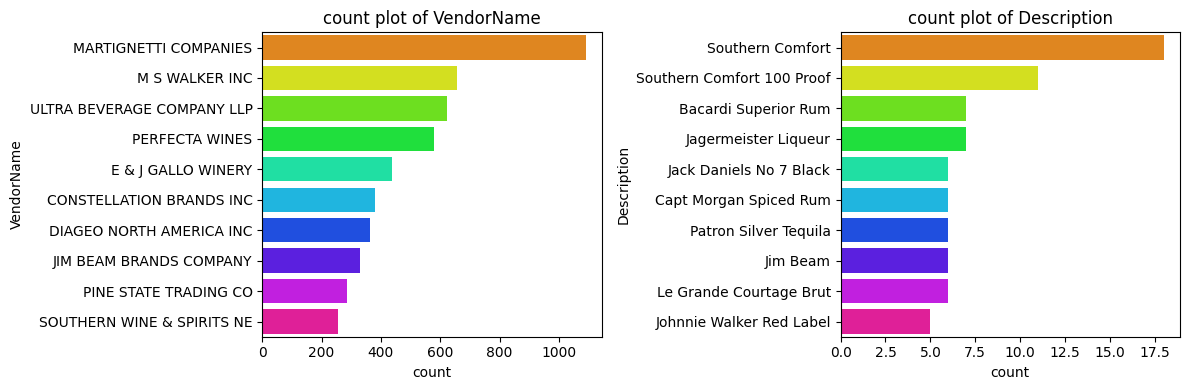

In [10]:
cat_col = ['VendorName', 'Description']

plt.figure(figsize =  (12,4))
for i, col in enumerate(cat_col):
    plt.subplot(1,2, i+1)
    sns.countplot(y =df[col], palette = 'hsv', order = df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()
                  
    

<span style="font-size:1.3em; font-weight:bold;">🛠 Data Cleaning Applied for Reliability</span>  
To enhance the reliability of the insights, we removed inconsistent data points where:  
- **GrossProfit > 0** (to exclude transactions leading to losses)  
- **ProfitMargin > 0** (to ensure analysis focuses on profitable margin)  
- **TotalSalesQuantity > 0** (to ensure analysis is calculated on sold products only)  

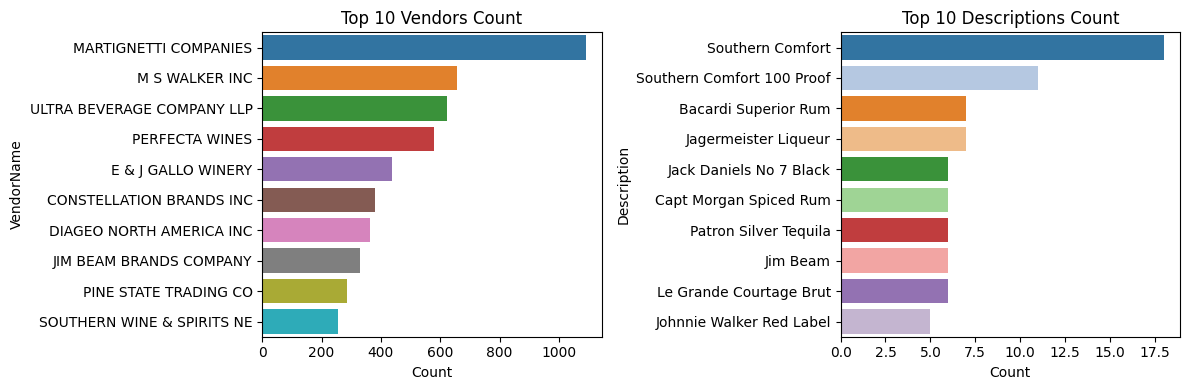

In [11]:
#through AI

top_vendors = df['VendorName'].value_counts().nlargest(10).index
top_descriptions = df['Description'].value_counts().nlargest(10).index

# Filter data to just top 10 Vendors and top 10 Descriptions
df_top_vendors = df[df['VendorName'].isin(top_vendors)]
df_top_descriptions = df[df['Description'].isin(top_descriptions)]

plt.figure(figsize=(12, 4))

# Plot 1: Horizontal countplot for top 10 Vendors (1 plot per row)
plt.subplot(1, 2, 1)
ax1 = sns.countplot(y='VendorName', data=df_top_vendors, order=top_vendors, palette='tab10')
plt.title('Top 10 Vendors Count')
plt.ylabel('VendorName')
plt.xlabel('Count')



# Plot 2: Horizontal countplot for top 10 Descriptions (1 plot per row)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(y='Description', data=df_top_descriptions, order=top_descriptions, palette='tab20')
plt.title('Top 10 Descriptions Count')
plt.ylabel('Description')
plt.xlabel('Count')



plt.tight_layout()
plt.show()

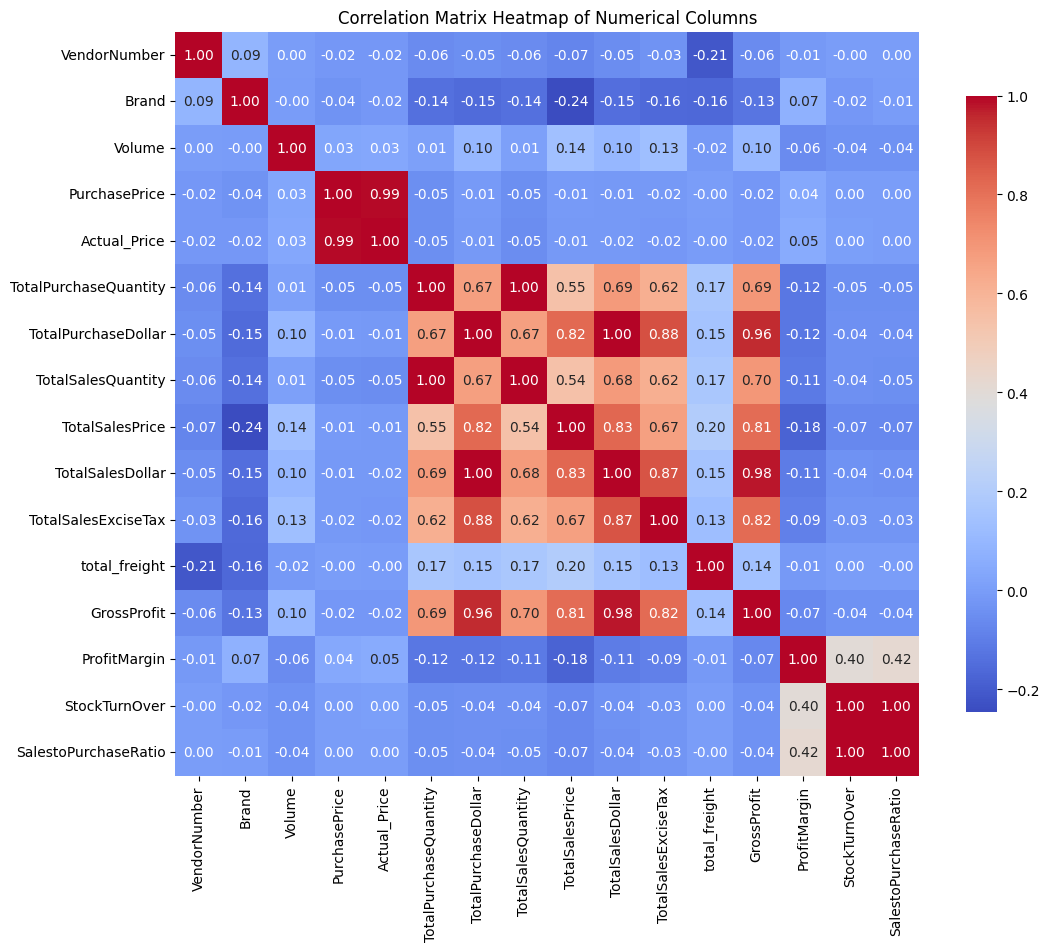

In [12]:
corr_matrix = df[num_cat].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap of Numerical Columns')
plt.show()

## 📊 Correlation Insights

- **Purchase Price vs Total Sales Dollar & Gross Profit**  
  - Weak correlation with **Total Sales Dollar** (-0.012) and **Gross Profit** (-0.016).  
  - This suggests that simply increasing sales price does not guarantee higher profitability — cost control and discounting policies may be more influential.

- **Total Purchase Quantity vs Total Sales Quantity**  
  - **Strong correlation** (0.999).  
  - Indicates highly efficient inventory turnover, excellent demand forecasting, and minimal overstock or wastage.

- **Total Sales Price vs Profit Margin**  
  - Almost no correlation (-0.181).  
  - Increasing or decreasing the total sales price does not directly impact profit margins.  
  - Margins are more influenced by cost structure, discounts, or fixed operational costs rather than just sales price.

- **Stock Turnover vs Profitability**  
  - No meaningful correlation with **Profit Margin** (0.402) or **Gross Profit** (-0.038).  
  - Changes in stock turnover do not consistently impact profitability.  
  - Profit outcomes are likely driven by pricing strategy, cost control, or operational efficiency rather than speed of sales.


# Identify Brands that need Promotional and Pricing Adjustment  
## Lower Sales Performance but High Profit Margins

In [13]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


In [14]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollar' : 'sum', 'ProfitMargin' : 'mean'}).reset_index()


Low_Brand = brand_performance['TotalSalesDollar'].quantile(0.15)
High_Brand = brand_performance['ProfitMargin'].quantile(0.85)



In [15]:
High_Brand

np.float64(64.97017552750113)

In [16]:
targeted_brand = brand_performance[(brand_performance['TotalSalesDollar'] <= Low_Brand) &
                                  (brand_performance['ProfitMargin'] >= High_Brand)] 
print
display(targeted_brand.sort_values('TotalSalesDollar'))


,Description,TotalSalesDollar,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.47
2369,Debauchery Pnt Nr,11.58,65.98
2070,Concannon Glen Ellen Wh Zin,15.95,83.45
2188,Crown Royal Apple,27.86,89.81
6237,Sauza Sprklg Wild Berry Marg,27.96,82.15
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.75
2271,Dad's Hat Rye Whiskey,538.89,81.85
57,A Bichot Clos Marechaudes,539.94,67.74
6245,Sbragia Home Ranch Merlot,549.75,66.44


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollar']<10000]

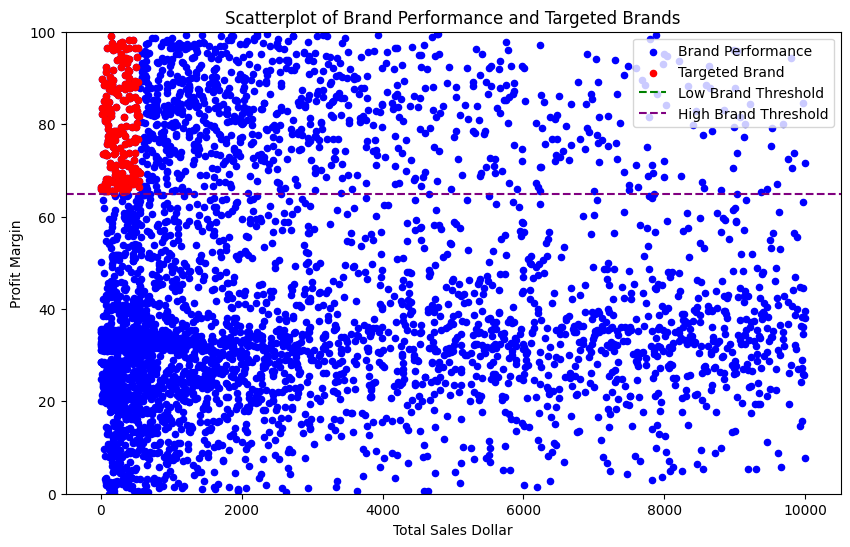

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for brand_performance
brand_performance.plot.scatter(x='TotalSalesDollar', y='ProfitMargin', color='blue', label='Brand Performance', ax=ax)

# Scatter plot for targeted_brand
targeted_brand.plot.scatter(x='TotalSalesDollar', y='ProfitMargin', color='red', label='Targeted Brand', ax=ax)

# Add horizontal lines
ax.axhline(y=Low_Brand, color='green', linestyle='--', label='Low Brand Threshold')
ax.axhline(y=High_Brand, color='purple', linestyle='--', label='High Brand Threshold')

# Set labels and title
ax.set_xlabel('Total Sales Dollar')
ax.set_ylabel('Profit Margin')
ax.set_ylim(0, 100)
ax.set_title('Scatterplot of Brand Performance and Targeted Brands')
ax.legend()

plt.show()

**197 brands** exhibit **lower sales** but **higher profit margin**,  
which could benefit from targeted **marketing**, **promotions**, or **price optimizations** to increase volume.

## Which Vendors and Brands Demonstrate the Highest Sales Performance?

In [19]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


In [20]:
Top_Vendor = df.groupby('VendorName')['TotalSalesDollar'].sum().reset_index()
Top_Vendor = Top_Vendor.sort_values('TotalSalesDollar', ascending = False)

Top_brand = df.groupby('Description')['TotalSalesDollar'].sum().reset_index()
Top_brand = Top_brand.sort_values('TotalSalesDollar', ascending = False)


# print('Top 10 Top seller Brands')
# display(Top_brand.head(10))

# print('Top 10 Top seller Vendors')
# display(Top_Vendor.head(10))                 

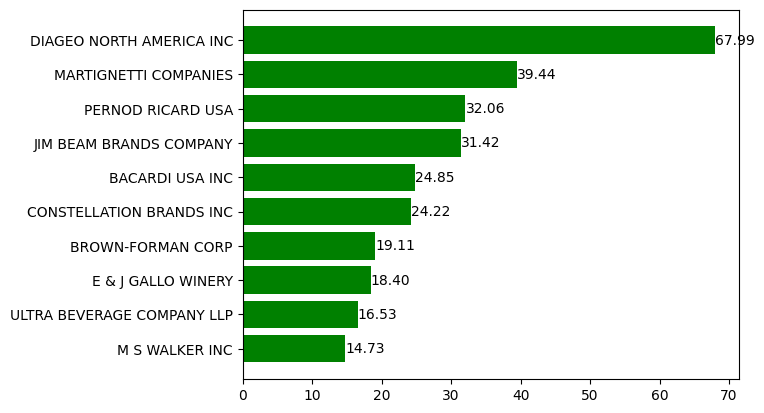

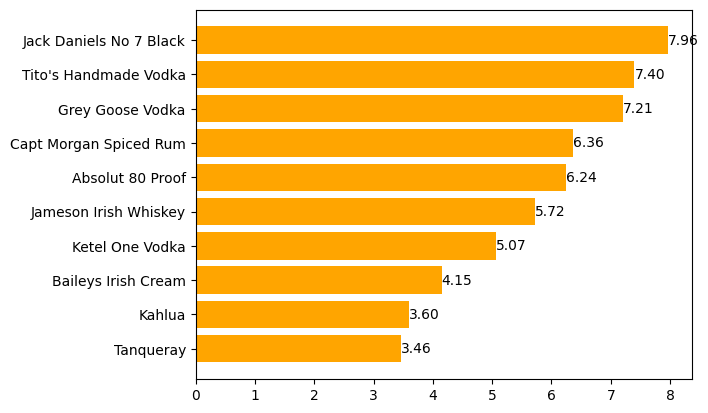

In [21]:
Top_Vendor = Top_Vendor.head(10)
Top_brand = Top_brand.head(10)

Top_Vendor['TotalSalesMillion'] = Top_Vendor['TotalSalesDollar'] / 1e6
Top_brand['TotalSalesMillion'] = Top_brand['TotalSalesDollar'] / 1e6

# Plot for top vendors
fig, ax = plt.subplots()
bars = ax.barh(Top_Vendor['VendorName'], Top_Vendor['TotalSalesMillion'], color='green')
ax.invert_yaxis()  # highest value on top
ax.bar_label(bars, fmt='%.2f')

# Plot for top brands
fig, ax = plt.subplots()
bars = ax.barh(Top_brand['Description'], Top_brand['TotalSalesMillion'], color='orange')
ax.invert_yaxis()  # highest value on top
ax.bar_label(bars, fmt='%.2f')

plt.show()

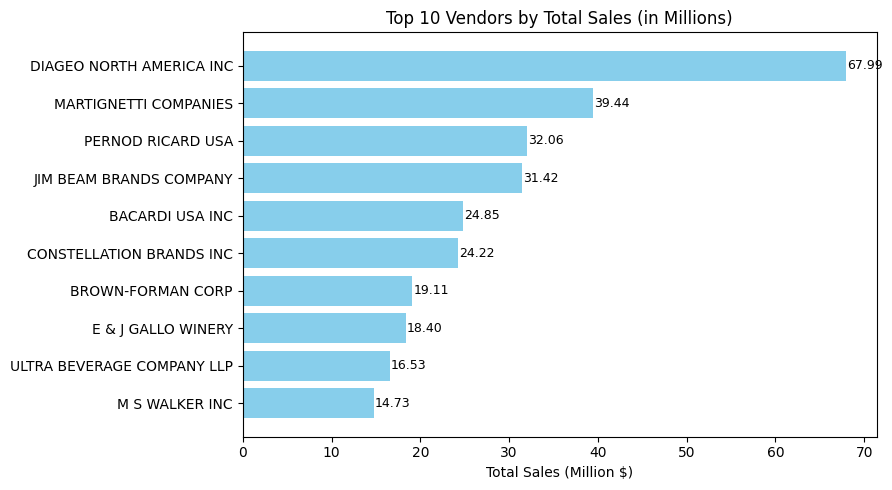

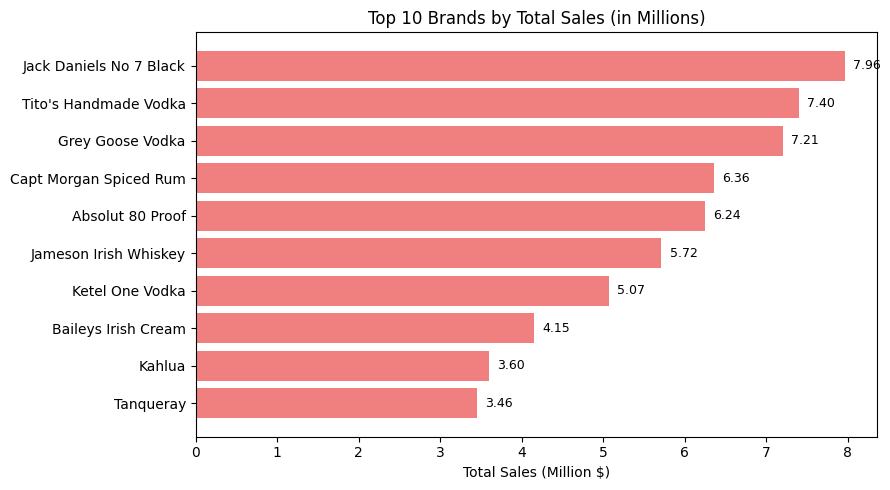

In [22]:
#Through AI

Top_Vendor['TotalSalesMillion'] = Top_Vendor['TotalSalesDollar'] / 1e6
Top_brand['TotalSalesMillion'] = Top_brand['TotalSalesDollar'] / 1e6

# Plot top 10 vendors - horizontal bar chart
top_vendors = Top_Vendor.head(10)
plt.figure(figsize=(9, 5))
bars = plt.barh(top_vendors['VendorName'], top_vendors['TotalSalesMillion'], color='skyblue')
plt.title('Top 10 Vendors by Total Sales (in Millions)')
plt.xlabel('Total Sales (Million $)')
plt.gca().invert_yaxis()  # To display the highest value on top

# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Plot top 10 brands - horizontal bar chart
top_brands = Top_brand.head(10)
plt.figure(figsize=(9, 5))
bars = plt.barh(top_brands['Description'], top_brands['TotalSalesMillion'], color='lightcoral')
plt.title('Top 10 Brands by Total Sales (in Millions)')
plt.xlabel('Total Sales (Million $)')
plt.gca().invert_yaxis()

# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Which Vendors contribute to the most of Total Purchase Dollar?

In [23]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


In [24]:
vendor_performance = df.groupby('VendorName').agg(
    {'TotalPurchaseDollar' : 'sum', 'TotalSalesDollar' : 'sum', 'GrossProfit' : 'sum'}).reset_index()


In [25]:
vendor_performance['TotalPurchaseDollar'] = vendor_performance['TotalPurchaseDollar']/1e6
vendor_performance['TotalSalesDollar'] = vendor_performance['TotalSalesDollar']/1e6
vendor_performance['GrossProfit'] = vendor_performance['GrossProfit']/1e6

In [26]:
vendor_performance['purchase_contribution%'] = (vendor_performance['TotalPurchaseDollar']/vendor_performance['TotalPurchaseDollar'].sum())*100

In [27]:
vendor_performance = vendor_performance.round(2)
vendor_performance = vendor_performance.sort_values('purchase_contribution%', ascending = False)


In [28]:
top_vendors = vendor_performance.head(10)
top_vendors['cumulative_contribution'] = top_vendors['purchase_contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollar,TotalSalesDollar,GrossProfit,purchase_contribution%,cumulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10,67.99,17.89,16.23,16.23
57,MARTIGNETTI COMPANIES,25.56,39.44,13.88,8.28,24.51
68,PERNOD RICARD USA,23.85,32.06,8.21,7.73,32.24
46,JIM BEAM BRANDS COMPANY,23.49,31.42,7.93,7.61,39.85
6,BACARDI USA INC,17.43,24.85,7.42,5.65,45.50
20,CONSTELLATION BRANDS INC,15.27,24.22,8.95,4.95,50.45
11,BROWN-FORMAN CORP,13.78,19.11,5.33,4.47,54.92
30,E & J GALLO WINERY,12.07,18.40,6.33,3.91,58.83
106,ULTRA BEVERAGE COMPANY LLP,11.19,16.53,5.34,3.63,62.46
79,SAZERAC CO INC,10.26,13.75,3.49,3.33,65.79


In [29]:
top_vendors['purchase_contribution%'].sum()


np.float64(65.79)

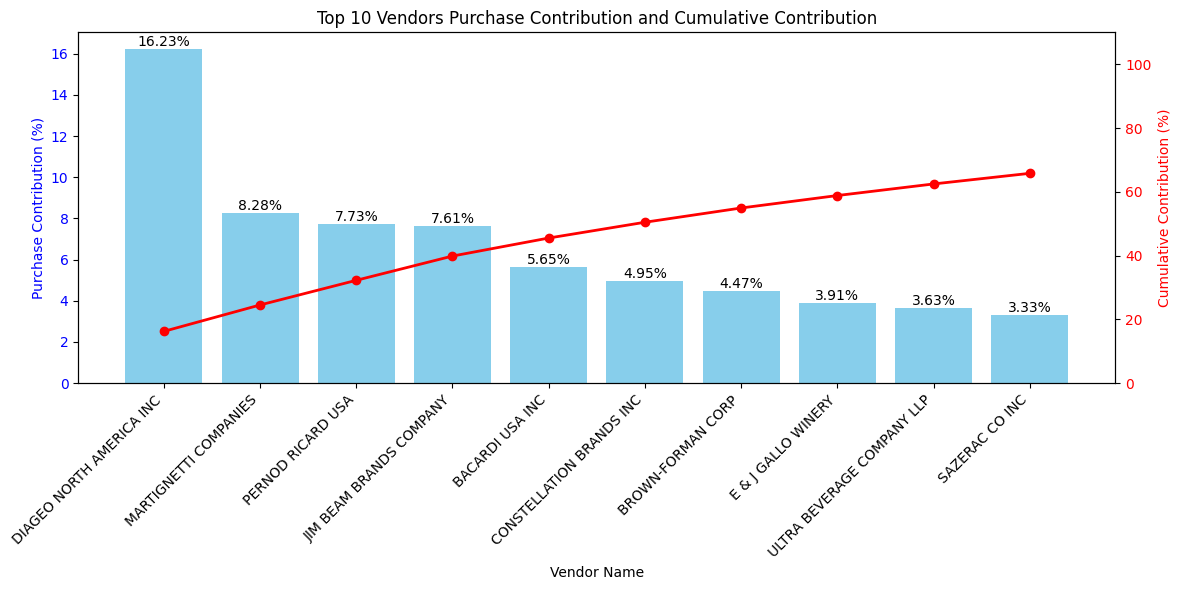

Sum of purchase_contribution: 65.79


In [30]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for purchase contribution (percentage)
bars = ax1.bar(top_vendors['VendorName'], top_vendors['purchase_contribution%'], color='skyblue')
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax1.set_xlabel('Vendor Name')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
ax1.bar_label(bars, fmt='%.2f%%')

# Create a second y-axis to plot cumulative contribution line
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['cumulative_contribution'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)  # y-limit slightly above 100 for clarity

ax1.set_title('Top 10 Vendors Purchase Contribution and Cumulative Contribution')

plt.tight_layout()
plt.show()

# Also, check the sum for purchase contribution
print('Sum of purchase_contribution:', top_vendors['purchase_contribution%'].sum())

# How much of total Procurement is dependent on the top Vendors?

In [31]:
print(f'Total Procurement is dependent on the top Vendors is {round(top_vendors['purchase_contribution%'].sum(),2)}%')


Total Procurement is dependent on the top Vendors is 65.79%


In [32]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


In [33]:
vendors = list(top_vendors['VendorName'])
purchase_contributions = list(top_vendors['purchase_contribution%'])


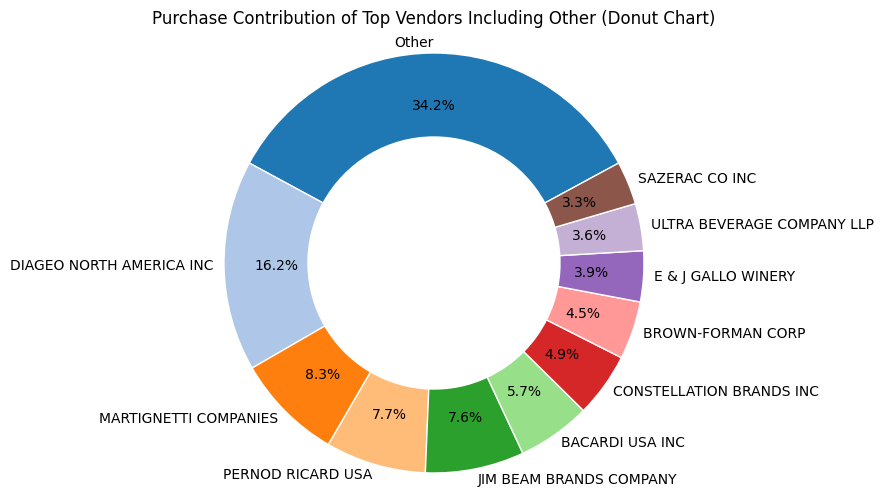

In [34]:
vendors = list(top_vendors['VendorName'])
purchase_contributions = list(top_vendors['purchase_contribution%'])

# Calculate remaining percentage for 'Other'
remaining = 100 - sum(purchase_contributions)
if remaining > 0:
    vendors.insert(0, 'Other')  
    purchase_contributions.insert(0, remaining)

# Define colors
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(vendors))]

# --- Compute startangle so that 'Other' slice is centered on top ---
other_pct = purchase_contributions[0]
other_mid_angle = other_pct / 2 * 360 / 100   # degrees from start of slice to its midpoint
desired_mid = 90                              # we want the midpoint at top
startangle = desired_mid - other_mid_angle    # shift accordingly

fig, ax = plt.subplots(figsize=(7, 6))

# Create the donut chart
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=startangle,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.75,
    labeldistance=1.05,
    textprops=dict(color="black", fontsize=10)
)

# Draw white circle for donut hole
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Purchase Contribution of Top Vendors Including Other (Donut Chart)')
plt.axis('equal')
plt.show()

### “65% of our procurement spend is concentrated with our top 10 vendors, while about 35% is spread across many smaller suppliers. We need to focus on strategic partnerships with the top vendors, while evaluating consolidation opportunities for the ‘Other’ segment.”

# Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving?

In [35]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27


In [36]:
df['Purchase_Unit'] = df['TotalPurchaseDollar']/ df['TotalPurchaseQuantity']
df['Order_size'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['small', 'midium', 'large'])


In [37]:
df.groupby('Order_size')[['Purchase_Unit']].mean()

,Purchase_Unit
Order_size,
small,38.94
midium,15.48
large,10.78


In [38]:
df.groupby('Order_size')[['PurchasePrice']].mean() # it is also aplicabel without getting purchaseunit price

,PurchasePrice
Order_size,
small,38.94
midium,15.48
large,10.78


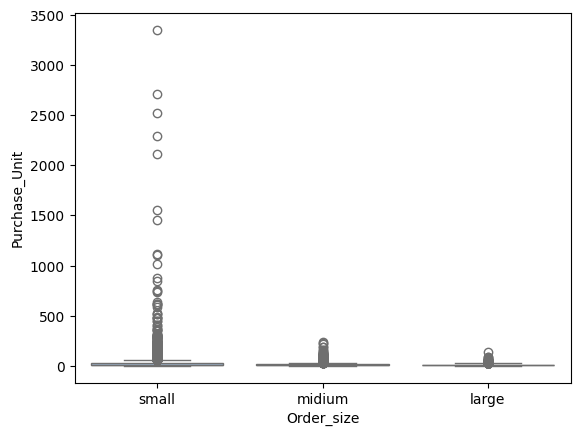

In [39]:
sns.boxplot(data = df, x = 'Order_size', y = 'Purchase_Unit', palette = 'pastel')
plt.show()

## Conclusion:
#### .Vendors buying in bulk(large order size) get the lowest unit price (10.78)meaning higher margin, if they can manage inventory efficiently.
#### .The difference between small and large order size is substantial( 72% reduction in unit cost)
#### .It confirms a clear bulk discount effect on unit price. To maximize cost savings, consider purchasing in medium to large quantities aligned with supplier discount thresholds, while carefully balancing storage capability and demand forecasts to avoid unnecessary holding costs or overstock.
                                                                    

# Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [40]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,Purchase_Unit,Order_size
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34,26.27,large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27,23.19,large


In [52]:
less_turnover = df[df['StockTurnOver']<1].groupby(['VendorNumber', 'VendorName'])[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending = True).head(10)
less_turnover

,,StockTurnOver
VendorNumber,VendorName,
1703,ALISA CARR BEVERAGES,0.62
6830,PARK STREET IMPORTS LLC,0.70
3951,HIGHLAND WINE MERCHANTS LLC,0.71
1650,Circa Wines,0.76
17037,Dunn Wine Brokers,0.77
2876,CENTEUR IMPORTS LLC,0.77
28750,SMOKY QUARTZ DISTILLERY LLC,0.78
173357,TAMWORTH DISTILLING,0.80
90017,THE IMPORTED GRAPE LLC,0.81


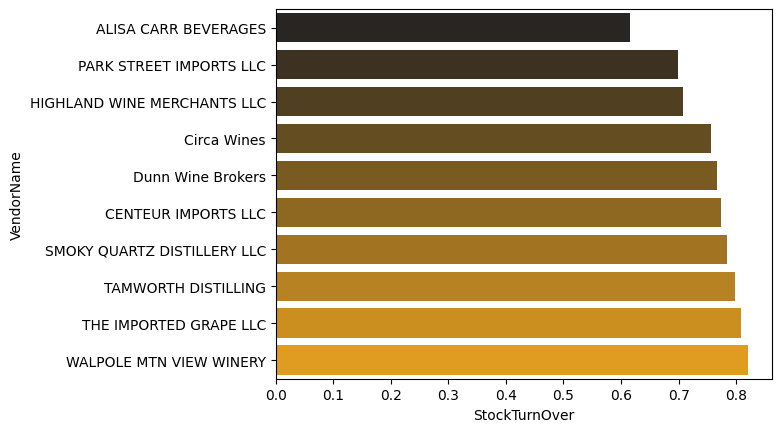

In [42]:
sns.barplot(data = less_turnover, x = 'StockTurnOver', y = 'VendorName', palette = 'dark:orange')
plt.show()
            

# How much Capital is locked in unsold inventory per vendor, and which vendor contribute the most to it?

In [43]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollar,TotalSalesExciseTax,total_freight,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,Purchase_Unit,Order_size
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.00,26.27,36.99,145080,3811251.60,142049.00,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34,26.27,large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.00,23.19,28.99,164038,3804041.22,160247.00,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27,23.19,large


In [44]:
df['stock_status'] = df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'] 
df['UnsoldInventory'] = df['stock_status']*df['PurchasePrice']
Total_unsold = round(df['UnsoldInventory'].sum()/1e6, 2)
print (f'Total_unsold inventory is {Total_unsold}M')

Total_unsold inventory is 2.68M


In [45]:
Unsold_inventory_per_vendor = df.groupby('VendorName')['UnsoldInventory'].sum().reset_index().sort_values('UnsoldInventory', ascending = False)
Unsold_inventory_per_vendor['UnsoldInventory'] =  Unsold_inventory_per_vendor['UnsoldInventory'] / 1e3 
Unsold_inventory_per_vendor['UnsoldInventory'] = Unsold_inventory_per_vendor['UnsoldInventory'].apply(lambda x: f"${x:,.2f}K")
Unsold_inventory_per_vendor.head(10)

,VendorName,UnsoldInventory
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
79,SAZERAC CO INC,$296.95K
30,E & J GALLO WINERY,$228.28K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K
54,MAJESTIC FINE WINES,$114.46K


# What is the 95% confidense intervals for profit margin of top_performing and low_performing vendor?

In [46]:
top_threshold = df['TotalSalesDollar'].quantile(0.75)
low_threshold = df['TotalSalesDollar'].quantile(0.25)

top_vendors = df[df['TotalSalesDollar'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollar'] <= low_threshold]['ProfitMargin'].dropna()

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critcal = stats.t.ppf((1 + confidence) / 2, df = len(data)-1)
    margin_of_error = t_critcal * std_err
    return (mean_val,  mean_val - margin_of_error, mean_val + margin_of_error) 

In [47]:
topmean, toplower, topupper = confidence_interval(top_vendors)
lowmean, lowlower, lowupper = confidence_interval(low_vendors)

print (f"Top_vendor 95% COI ({toplower : .2f}, {topupper : .2f}, Mean :{topmean : .2f}")
print (f"Low_vendor 95% COI ({lowlower : .2f}, {lowupper : .2f}, Mean :{lowmean : .2f}")


Top_vendor 95% COI ( 30.74,  31.62, Mean : 31.18
Low_vendor 95% COI ( 40.57,  42.71, Mean : 41.64


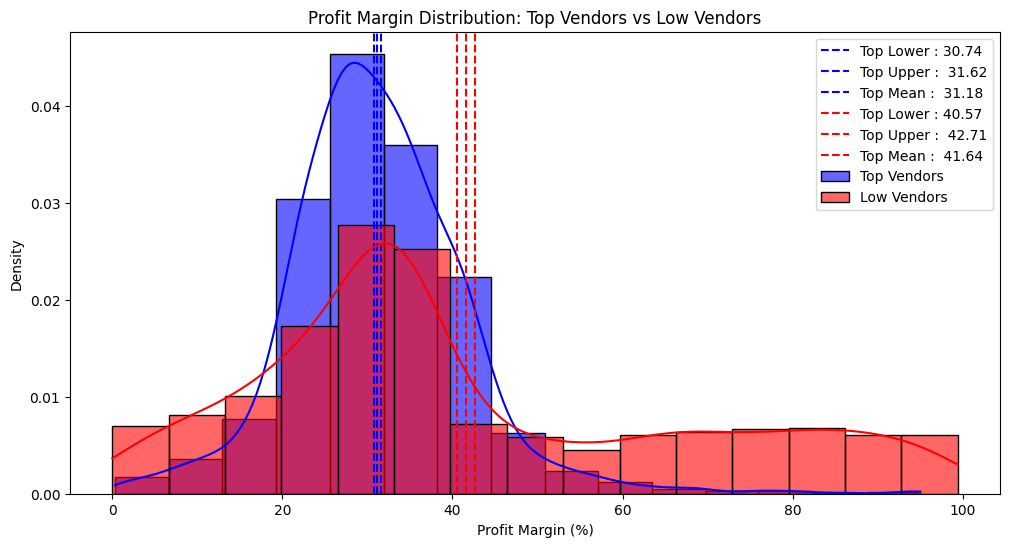

  .The confidence interval for low performing vendors (40.57% to 42.71%) is significantly higher than that of top performing venodrs.
  .This suggests that vendors with lower sales tend to maintain higher profit, potentially due to premium pricing or lower operational cost.
  .For High Performing Vendors : If they aim to improve profitability, they could explore selective price adjustment, cost optimization or
   building strategies.
  .For Low Performing Vendors : Despite higher profit margin, their low sale volume might indicate a better marketing, competitive pricing
   or improved distribution strategies.


In [48]:
plt.figure(figsize=(12, 6))

# Plot histogram for Top Vendors
sns.histplot(top_vendors, color='blue', label='Top Vendors', kde=True, stat='density', bins=15, alpha=0.6)
plt.axvline (toplower, color = 'blue', linestyle = '--', label = f"Top Lower : {toplower :.2f}")
plt.axvline (topupper, color = 'blue', linestyle = '--', label = f"Top Upper : {topupper: .2f}")
plt.axvline (topmean, color = 'blue', linestyle = '--', label = f"Top Mean : {topmean : .2f}")

# Plot histogram for Low Vendors
sns.histplot(low_vendors, color='red', label='Low Vendors', kde=True, stat='density', bins=15, alpha=0.6)
plt.axvline (lowlower, color = 'red', linestyle = '--', label = f"Top Lower : {lowlower :.2f}")
plt.axvline (lowupper, color = 'red', linestyle = '--', label = f"Top Upper : {lowupper: .2f}")
plt.axvline (lowmean, color = 'red', linestyle = '--', label = f"Top Mean : {lowmean : .2f}")

plt.title('Profit Margin Distribution: Top Vendors vs Low Vendors')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Density')

plt.legend()
plt.show()
print ("""  .The confidence interval for low performing vendors (40.57% to 42.71%) is significantly higher than that of top performing venodrs.
  .This suggests that vendors with lower sales tend to maintain higher profit, potentially due to premium pricing or lower operational cost.
  .For High Performing Vendors : If they aim to improve profitability, they could explore selective price adjustment, cost optimization or
   building strategies.
  .For Low Performing Vendors : Despite higher profit margin, their low sale volume might indicate a better marketing, competitive pricing
   or improved distribution strategies.""")

# Is there a significant profit margin difference between top performing and low performing vendors?

In [49]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'Volume',
       'PurchasePrice', 'Actual_Price', 'TotalPurchaseQuantity',
       'TotalPurchaseDollar', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollar', 'TotalSalesExciseTax', 'total_freight',
       'GrossProfit', 'ProfitMargin', 'StockTurnOver', 'SalestoPurchaseRatio',
       'Purchase_Unit', 'Order_size', 'stock_status', 'UnsoldInventory'],
      dtype='object')

In [50]:
top_threshold = df['TotalSalesDollar'].quantile(0.75)
low_threshold = df['TotalSalesDollar'].quantile(0.25)

top_vendors = df[df['TotalSalesDollar'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollar'] <= low_threshold]['ProfitMargin'].dropna()

t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)

alpha = 0.5
t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)
print("Hypothesis Test for Profit Margin Difference Between Top and Low Performing Vendors")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("✅ Reject H₀: There is a statistically significant difference in profit margin.")
else:
    print("❌ Fail to reject H₀: No significant difference in profit margin.")

Hypothesis Test for Profit Margin Difference Between Top and Low Performing Vendors
T-statistic: -17.80
P-value: 0.0000
✅ Reject H₀: There is a statistically significant difference in profit margin.
